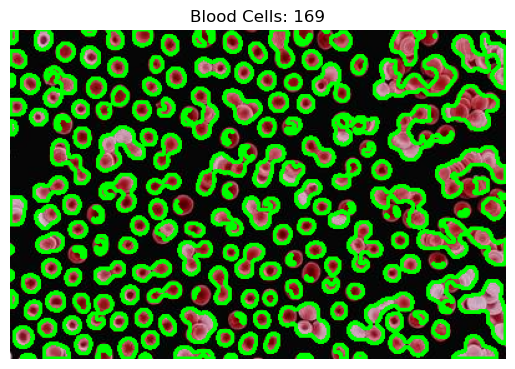

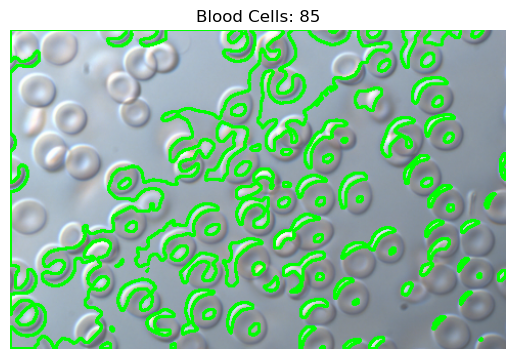

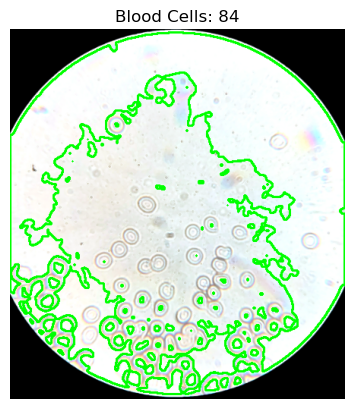

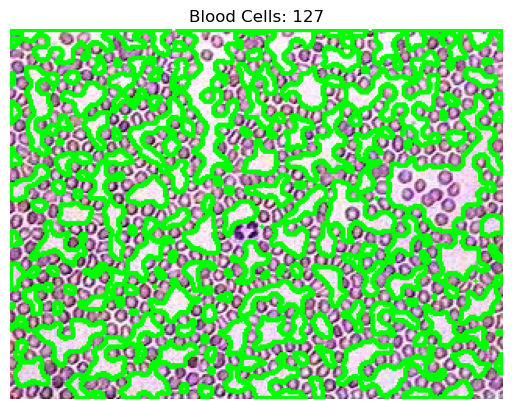

Blood cell data updated to CSV and XLSX files.


In [12]:
#  Hi, my name is Tate Doherty and this is my Blood Cell Counter Project. The presented project is a Python-based blood cell 
# counting application that utilizes image processing techniques to analyze a collection of blood cell images. This project 
# employs thresholding and contour detection to identify and count blood cells within the images. The update_files function 
# manages the data by updating CSV and Excel files with information on the blood cell count and associated indices,
# meticulously checking for duplicates to avoid redundancy in the data records. 

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Function to count blood cells in an image with parameter tuning
def count_blood_cells(image_path, blur_kernel_size=5, threshold_value=150):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to reduce noise (parameter: blur_kernel_size)
    blur_median = cv2.medianBlur(gray, blur_kernel_size)

    # Apply Gaussian blur to further smooth the image
    blur_gaussian = cv2.GaussianBlur(blur_median, (9, 9), 0)

    # Apply histogram equalization to improve contrast
    equalized = cv2.equalizeHist(blur_gaussian)

    # Create a CLAHE object for local contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahed = clahe.apply(equalized)

    # Apply contrast stretching
    min_val = np.min(clahed)
    max_val = np.max(clahed)
    contrast_stretch = (clahed - min_val) * 255.0 / (max_val - min_val)

    # Convert the image to the correct format (8-bit single-channel)
    binary = np.uint8(contrast_stretch)

    # Apply thresholding to segment the blood cells (parameter: threshold_value)
    _, binary = cv2.threshold(binary, threshold_value, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

    # Count the number of blood cells
    num_cells = len(contours)

    return image_with_contours, num_cells

# Function to update CSV and Excel files
def update_files(index, cell_count, csv_path, excel_path):
    data = {'blood_cell_index': [index], 'cell_count': [cell_count]}
    df = pd.DataFrame(data)

    # Check if the CSV file exists
    if os.path.exists(csv_path):
        # If it exists, load the existing CSV file
        existing_df = pd.read_csv(csv_path)
        # Check for duplicates before appending
        if index not in existing_df['blood_cell_index'].values:
            # Append the new data to the existing data
            df = pd.concat([existing_df, df], ignore_index=True)

    # Save the updated CSV file
    df.to_csv(csv_path, index=False)

    # Check if the Excel file exists
    if os.path.exists(excel_path):
        # If it exists, load the existing Excel file
        existing_df = pd.read_excel(excel_path)
        # Check for duplicates before appending
        if index not in existing_df['blood_cell_index'].values:
            # Append the new data to the existing data
            df = pd.concat([existing_df, df], ignore_index=True)

    # Save the updated Excel file
    df.to_excel(excel_path, index=False)

# Path to the folder containing your images
image_folder = r"C:\Users\~\Downloads\Blood Cell Images"

# Output folder for CSV and Excel files
output_folder = os.path.join(os.path.expanduser("~"), "Downloads", "Blood Cell Images")

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Parameter tuning values
blur_kernel_size = 5  # You can experiment with different values
threshold_value = 150  # You can experiment with different values

# Check if the CSV file exists
csv_file = os.path.join(output_folder, "blood_cell_counts.csv")
if not os.path.exists(csv_file):
    # If it doesn't exist, create an empty CSV file with headers
    pd.DataFrame(columns=['blood_cell_index', 'cell_count']).to_csv(csv_file, index=False)

# Check if the Excel file exists
excel_file = os.path.join(output_folder, "blood_cell_counts.xlsx")
if not os.path.exists(excel_file):
    # If it doesn't exist, create an empty Excel file with headers
    pd.DataFrame(columns=['blood_cell_index', 'cell_count']).to_excel(excel_file, index=False)

# Process each image with parameter tuning and display the result
existing_index = 0  # Variable to keep track of the existing index
for image_file in os.listdir(image_folder):
    if image_file.lower().endswith(".png"):
        image_path = os.path.join(image_folder, image_file)

        # Increment the existing index
        existing_index += 1

        # Count blood cells in the image
        processed_image, cell_count = count_blood_cells(image_path, blur_kernel_size, threshold_value)

        # Update CSV and Excel files
        update_files(existing_index, cell_count, csv_file, excel_file)

        # Display the processed image and cell count
        plt.figure()
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Blood Cells: {cell_count}")
        plt.axis('off')
        plt.show()

# Display the final message
print("Blood cell data updated to CSV and XLSX files.")
